# This will be the title

**Mattia Piazza 2073223**

This project addresses the task of lung disease classification using the ChestMNIST dataset, as part of the "Machine Learning for Human Data" final exam.

The objective is to develop and evaluate multiple custom neural network architectures to classify frontal chest X-ray images into 14 disease categories, in a multi-label classification setting.

Key aspects of this work include:

Loading and preprocessing the ChestMNIST dataset at multiple resolutions (64x64 and 128x128)

Designing and training custom Convolutional Neural Networks (CNNs) from scratch using TensorFlow

Exploring architectural enhancements such as attention mechanisms and subpatch-based decision fusion

Incorporating techniques like image normalization, data stratification, and class weighting

Comparing model performance using classification metrics such as accuracy, F1-score, AUC, and confusion matrices

Evaluating training efficiency through loss/accuracy curves and runtime/memory complexity analysis

This notebook demonstrates a complete deep learning pipeline for medical image analysis, focusing on how model design choices affect performance, interpretability, and computational cost.

As a starting point, a baseline CNN was implemented and evaluated on 128×128 grayscale chest X-ray images from the ChestMNIST dataset.

## Exploratory Data Analysis

In this section we'll start analyzing our data

### Download ChestMNIST Datasets

Here we download and load three different sizes of the chest images:

- 64x64
- 128x128
- 224x224

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# All imports
from project_c3.utils.eda_utils import download_MNIST_dataset, get_label_names, plot_image_per_label, plot_label_distribution, plot_n_label_per_sample
from project_c3.utils.data_preparation import load_set
from project_c3.models.cnn_baseline import cnn_baseline_model
from project_c3.scripts.train import train_model

In [ ]:
# Download and load ChestMNIST dataset and save them in data/

dataset_name = "chestmnist"

# ChestMNIST 64x64
chest_dataset_64 = download_MNIST_dataset(f"{dataset_name}_64")

# ChestMNIST 128x128
chest_dataset_128 = download_MNIST_dataset(f"{dataset_name}_128")

# ChestMNIST 224x224
chest_dataset_224 = download_MNIST_dataset(f"{dataset_name}_224")

File data/chestmnist_64.npz already exists. Skipping download.
File data/chestmnist_128.npz already exists. Skipping download.
File data/chestmnist_224.npz already exists. Skipping download.


### Let's look at some images

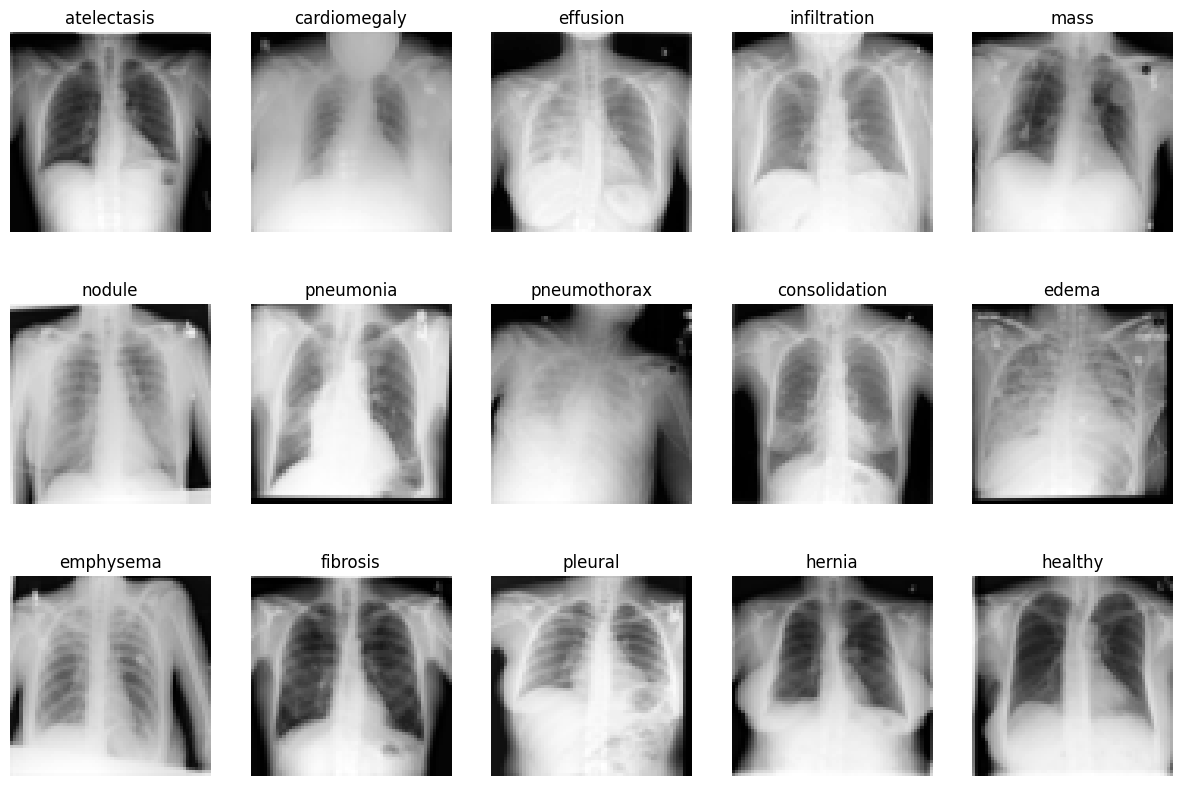

In [ ]:
# Extract labels name for ChestMNIST datasets
label_names = get_label_names(dataset_name)

# Plot images per label
plot_image_per_label(chest_dataset_64, label_names)

### Distribution of labels

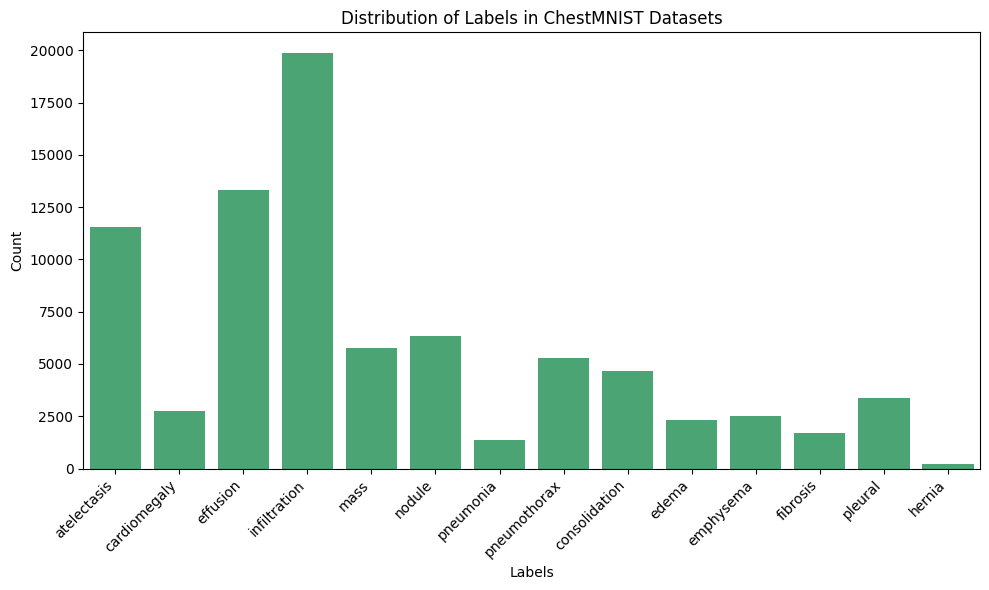

In [ ]:
# Plot label distribution
plot_label_distribution(chest_dataset_64, label_names)

### Labels per Sample

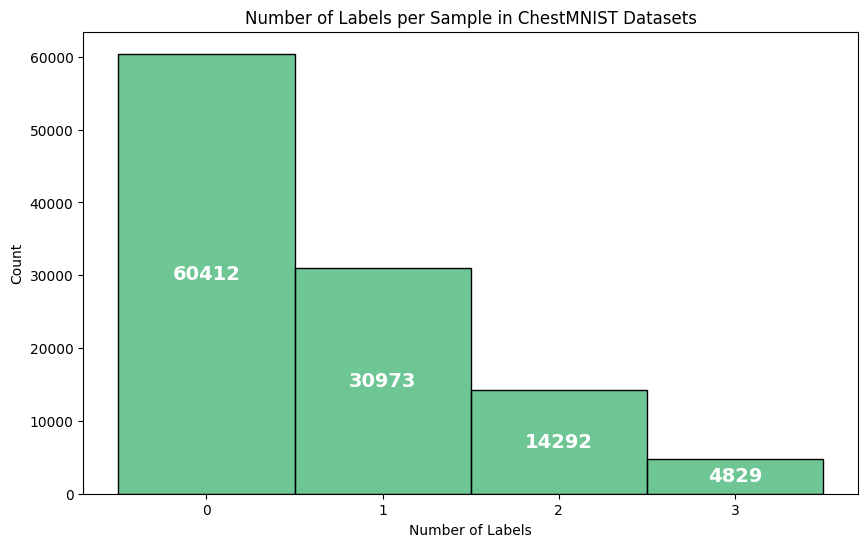

In [ ]:
# Plot number of labels per sample
plot_n_label_per_sample(chest_dataset_64)

## Data Preparation

This section prepapres the data for the training

In [ ]:
train_data_64 = load_set(chest_dataset_64, "train", n_sample=1000)
val_data_64 = load_set(chest_dataset_64, "val", n_sample=200)
test_data_64 = load_set(chest_dataset_64, "test", n_sample=200)

Loaded train set with shape: (1000, 64, 64, 1), labels shape: (1000, 14)
Loaded val set with shape: (200, 64, 64, 1), labels shape: (200, 14)
Loaded test set with shape: (200, 64, 64, 1), labels shape: (200, 14)


## Models Creation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [ ]:
input_shape = train_data_64[0].shape[1:] # Access the shape of the first image in the training set

# mdl_cnn_baseline_64 = cnn_baseline_model(
#     input_shape=input_shape,
#     num_classes=len(label_names), 
#     model_name="cnn_baseline_64")

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'binary_crossentropy'
metrics = ['accuracy', 'precision', 'recall']

mdl_cnn_baseline_64 = cnn_baseline_model(
    input_shape=input_shape,
    num_classes=len(label_names),
    optimizer=optimizer,
    loss=loss,
    metrics=metrics, 
    model_name="cnn_baseline_64")

mdl_cnn_baseline_64.summary()


Model: "cnn_baseline_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,430 (2.61 MB)

 Trainable params: 684,430 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## Time to train

In [ ]:
epochs = 10
batch_size = 32 
lr = 0.001
patience = 10

In [ ]:
model, history = train_model(
    model=mdl_cnn_baseline_64,
    train_data=train_data_64,
    val_data=val_data_64,
    test_data=test_data_64,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    use_class_weights=True,
    patience=patience,
    save_history=True)

Starting training for cnn_baseline_64 with 64x64 images

Using class weights

Starting training for 10 epochs...
Epoch 1/10


30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0384 - loss: 3.9706 - precision: 0.0459 - recall: 0.0749
Epoch 1: val_loss improved from inf to 0.26797, saving model to models/cnn_baseline_64_64_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.0404 - loss: 3.9363 - precision: 0.0459 - recall: 0.0697 - val_accuracy: 0.0900 - val_loss: 0.2680 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/10
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3436 - loss: 3.2932 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss improved from 0.26797 to 0.20839, saving model to models/cnn_baseline_64_64_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3402 - loss: 3.2804 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0900 - val_loss: 0.2084 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/10
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0749 - loss: 2.6609 